In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load datasets
apps = pd.read_csv("apps.csv")
reviews = pd.read_csv("user_reviews.csv")

# Quick check
print("Apps shape:", apps.shape)
print("Reviews shape:", reviews.shape)
apps.head()


Apps shape: (9659, 14)
Reviews shape: (64295, 5)


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# Drop duplicates
apps.drop_duplicates(subset='App', inplace=True)

# --- Installs ---
apps['Installs'] = apps['Installs'].astype(str)
apps['Installs'] = apps['Installs'].str.replace('+','', regex=False).str.replace(',','', regex=False)
apps['Installs'] = pd.to_numeric(apps['Installs'], errors='coerce')

# --- Price ---
apps['Price'] = apps['Price'].astype(str).str.replace('$','', regex=False)
apps['Price'] = pd.to_numeric(apps['Price'], errors='coerce')

# --- Size ---
apps['Size'] = apps['Size'].replace('Varies with device', np.nan)
apps['Size'] = apps['Size'].astype(str).str.replace('M','e6', regex=False).str.replace('k','e3', regex=False)
apps['Size'] = pd.to_numeric(apps['Size'], errors='coerce')

# --- Rating ---
apps['Rating'] = pd.to_numeric(apps['Rating'], errors='coerce')

# --- Last Updated ---
apps['Last Updated'] = pd.to_datetime(apps['Last Updated'], errors='coerce')

# Drop rows missing critical info
apps = apps.dropna(subset=['Category','Rating','Installs'])




In [7]:
# After all cleaning steps
apps = apps.dropna(subset=['Category','Rating','Installs'])

# Show cleaned DataFrame info
apps.info()

# Optional: see first 5 rows
apps.head()


<class 'pandas.core.frame.DataFrame'>
Index: 8196 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8196 non-null   object        
 1   Category        8196 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         8196 non-null   int64         
 4   Size            7027 non-null   float64       
 5   Installs        8196 non-null   float64       
 6   Type            8196 non-null   object        
 7   Price           8196 non-null   float64       
 8   Content Rating  8196 non-null   object        
 9   Genres          8196 non-null   object        
 10  Last Updated    8196 non-null   datetime64[ns]
 11  Current Ver     8192 non-null   object        
 12  Android Ver     8194 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 896.4+ KB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


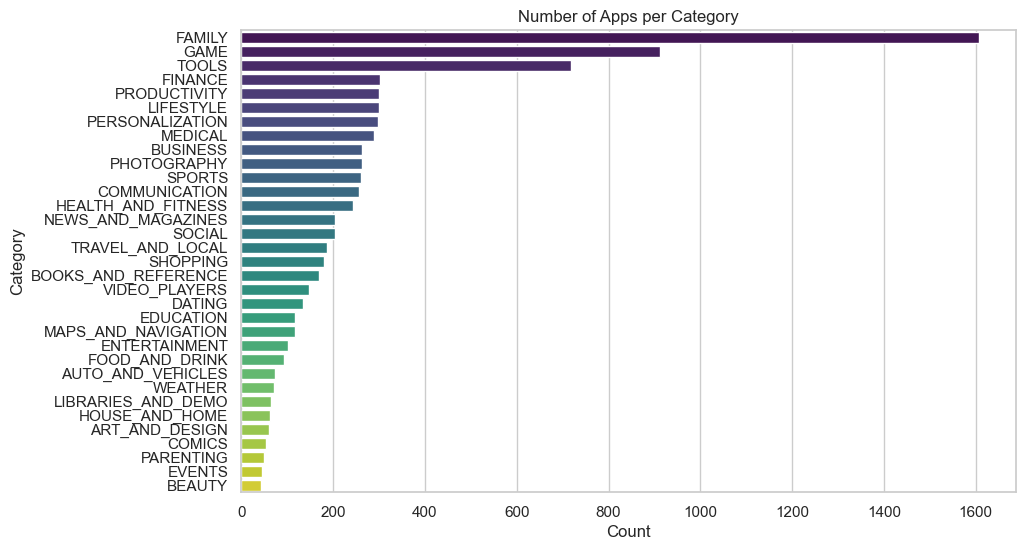

In [9]:
# Prepare DataFrame for Seaborn
category_counts_df = category_counts.reset_index()
category_counts_df.columns = ['Category', 'Count']

# Add temporary hue column
category_counts_df['Hue'] = category_counts_df['Category']

# Plot with hue
sns.barplot(
    data=category_counts_df,
    y='Category',
    x='Count',
    hue='Hue',
    dodge=False,
    palette='viridis'
)

# Remove redundant legend
plt.legend([], [], frameon=False)
plt.title("Number of Apps per Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()



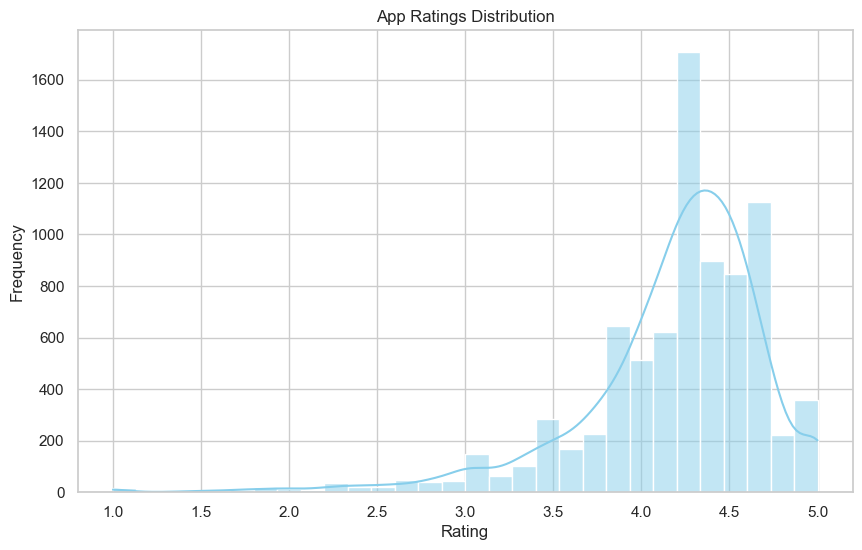

In [10]:
sns.histplot(apps['Rating'], bins=30, kde=True, color='skyblue')
plt.title("App Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


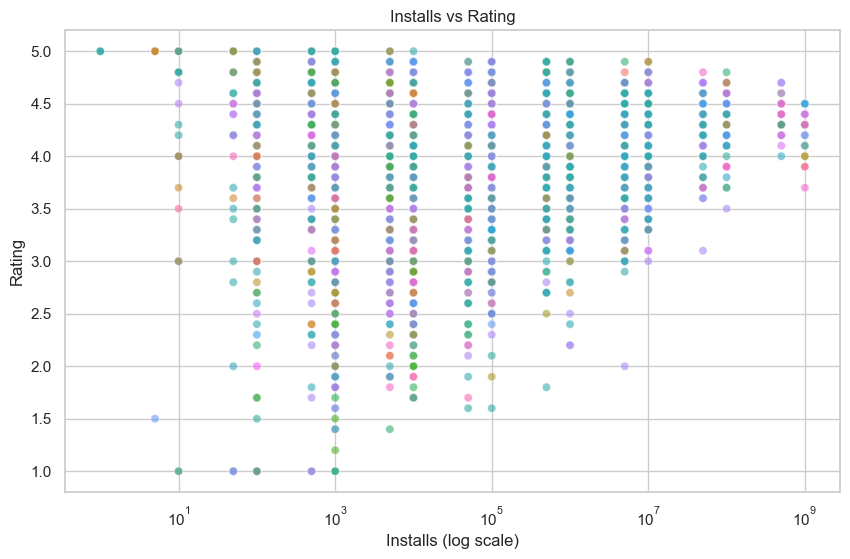

In [11]:
sns.scatterplot(data=apps, x='Installs', y='Rating', hue='Category', alpha=0.6, legend=False)
plt.xscale('log')
plt.title("Installs vs Rating")
plt.xlabel("Installs (log scale)")
plt.ylabel("Rating")
plt.show()


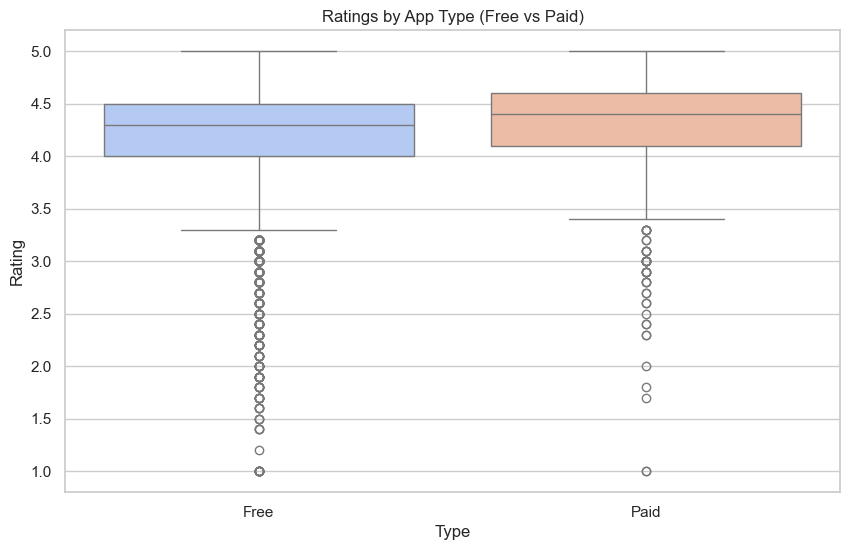

In [14]:
# Add temporary hue column
apps['Type_Hue'] = apps['Type']

# Plot with hue
sns.boxplot(
    data=apps,
    x='Type',
    y='Rating',
    hue='Type_Hue',
    dodge=False,
    palette='coolwarm'
)

# Remove redundant legend
plt.legend([], [], frameon=False)
plt.title("Ratings by App Type (Free vs Paid)")
plt.xlabel("Type")
plt.ylabel("Rating")
plt.show()


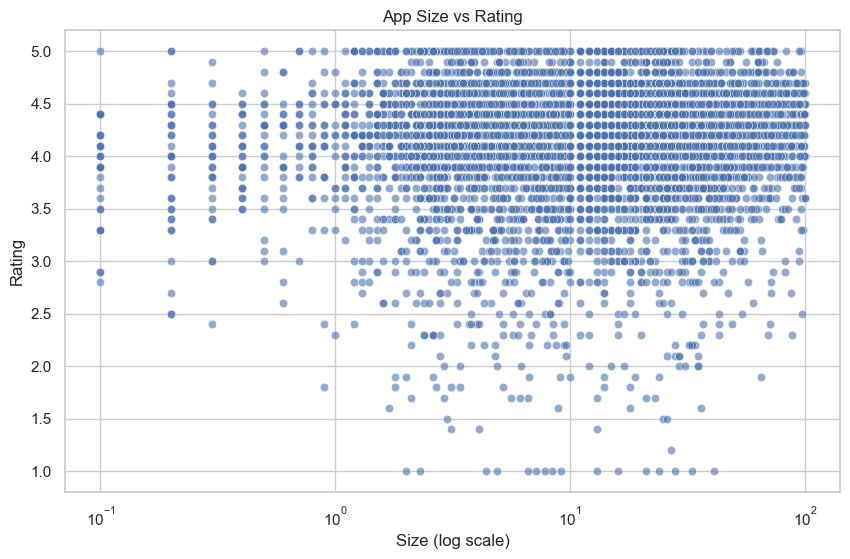

In [15]:
sns.scatterplot(data=apps, x='Size', y='Rating', alpha=0.6)
plt.xscale('log')
plt.title("App Size vs Rating")
plt.xlabel("Size (log scale)")
plt.ylabel("Rating")
plt.show()


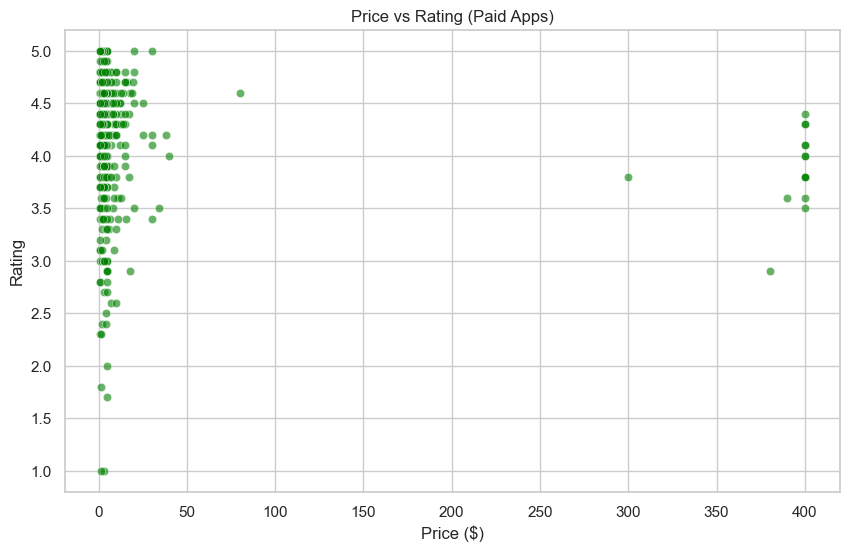

In [16]:
paid_apps = apps[apps['Type'] == 'Paid']
sns.scatterplot(data=paid_apps, x='Price', y='Rating', alpha=0.6, color='green')
plt.title("Price vs Rating (Paid Apps)")
plt.xlabel("Price ($)")
plt.ylabel("Rating")
plt.show()


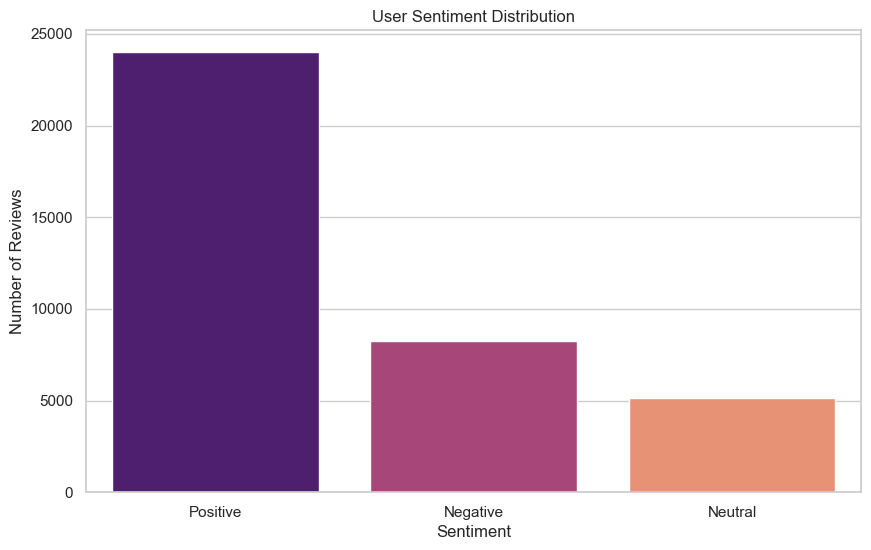

In [19]:
# Prepare DataFrame for Seaborn
sentiment_df = sentiment_counts.reset_index()
sentiment_df.columns = ['Sentiment', 'Count']
sentiment_df['Hue'] = sentiment_df['Sentiment']

# Plot with hue
sns.barplot(
    data=sentiment_df,
    x='Sentiment',
    y='Count',
    hue='Hue',
    dodge=False,
    palette='magma'
)

# Remove redundant legend
plt.legend([], [], frameon=False)
plt.title("User Sentiment Distribution")
plt.ylabel("Number of Reviews")
plt.show()



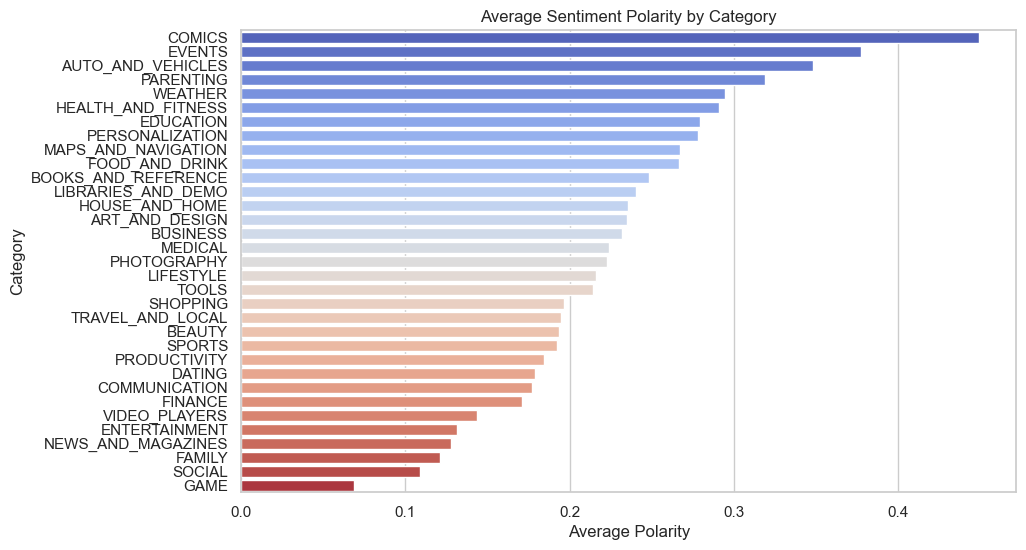

In [20]:
# Prepare DataFrame
category_sentiment_df = category_sentiment.reset_index()
category_sentiment_df.columns = ['Category', 'Avg_Polarity']
category_sentiment_df['Hue'] = category_sentiment_df['Category']

# Plot with hue
sns.barplot(
    data=category_sentiment_df,
    y='Category',
    x='Avg_Polarity',
    hue='Hue',
    dodge=False,
    palette='coolwarm'
)

# Remove redundant legend
plt.legend([], [], frameon=False)
plt.title("Average Sentiment Polarity by Category")
plt.xlabel("Average Polarity")
plt.ylabel("Category")
plt.show()



In [22]:
print("""
📊 Insights & Recommendations:

1. **Category Trends:** Categories like Games, Tools, and Education dominate the Play Store. Niche categories have less competition — potential opportunity for new apps.

2. **Ratings:** Most apps are rated between 4.0 and 4.5. Paid apps generally have slightly higher ratings than free apps.

3. **Installs vs Quality:** High-install apps do not always have the highest ratings. Focus on quality, user experience, and features to retain users.

4. **App Size & Performance:** Extremely large apps do not guarantee better ratings. Optimize app size to improve downloads and accessibility.

5. **Pricing Strategy:** Paid apps with reasonable prices tend to maintain better ratings. Monitor pricing trends for competitive positioning.

6. **User Sentiment:** Most user reviews are positive, but some categories show lower sentiment polarity. Regularly monitor reviews to quickly address complaints.

7. **Recommendations for Developers:** '''''''''l
   - Focus on categories with high demand but low competition.
   - Continuously update apps and improve user experience.
   - Analyze reviews for feature requests and bug fixes.
   - Optimize app size and performance for better adoption.

""")



📊 Insights & Recommendations:

1. **Category Trends:** Categories like Games, Tools, and Education dominate the Play Store. Niche categories have less competition — potential opportunity for new apps.

2. **Ratings:** Most apps are rated between 4.0 and 4.5. Paid apps generally have slightly higher ratings than free apps.

3. **Installs vs Quality:** High-install apps do not always have the highest ratings. Focus on quality, user experience, and features to retain users.

4. **App Size & Performance:** Extremely large apps do not guarantee better ratings. Optimize app size to improve downloads and accessibility.

5. **Pricing Strategy:** Paid apps with reasonable prices tend to maintain better ratings. Monitor pricing trends for competitive positioning.

6. **User Sentiment:** Most user reviews are positive, but some categories show lower sentiment polarity. Regularly monitor reviews to quickly address complaints.

7. **Recommendations for Developers:** '''''''''l
   - Focus on catego